#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Feature Engineering & UniVar Winsorizing

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Importing Libraries

In [58]:
import numpy  as np
import polars as pl
import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)
#pd.set_option('future.no_silent_downcasting',True) 

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import time, pickle
t_init = time.time()

import warnings 
warnings.filterwarnings('ignore') 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading DataSet

In [59]:
data = pickle.load( open('Data_Imputed_Into_None','rb') )  # load
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_num,bin_cat,ord_num,ord_cat,datetime,year,age,elapsed_days,month,hour,nominal_num,nominal_cat
row,,,,,,,,,,,,,,,,,,,,,,
2,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,Yes,5.0,Very High,2025-12-17 22:00:00,2001.0,27.0,141.0,10.0,21.0,0.0,Violet
3,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,Yes,4.0,High,2025-07-18 07:00:00,2020.0,35.0,5.0,3.0,18.0,2.0,Blue
4,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,Yes,1.0,Very Low,2022-08-24 21:00:00,2001.0,43.0,78.0,2.0,6.0,3.0,Green


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Handling Duplicates

In [60]:
#data = data.drop_duplicates()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Synthetic Date

#####   
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cats & Scalars

In [61]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float32
total_rooms             int32
total_bedrooms        float32
population            float32
households            float32
median_income         float64
median_house_value    float32
ocean_proximity        object
bin_num               float32
bin_cat                object
ord_num               float32
ord_cat                object
datetime               object
year                  float32
age                   float32
elapsed_days          float32
month                 float32
hour                  float32
nominal_num           float32
nominal_cat            object
dtype: object

In [62]:
Cs = [ col for col in data.columns if data[col].dtype in ['object', 'category']]
display(data[Cs].head(3))

DTs = [ 
    col for col in data.columns 
    if data[col].dtype not in ['object', 'category'] 
    and np.issubdtype( data[col].dtype, np.datetime64 )
]
D_dir_dep,  D_cyc_dep,  D_cyc_dep_sin_cos  =  [], [], []
D_dir_ind,  D_cyc_ind,  D_cyc_ind_sin_cos  =  [], [], []

My_Dicts  = [] 


#Ss = [ col for col in data.columns if data[col].dtype not in ['object', 'category'] and not np.issubdtype(data[col].dtype, np.datetime64)]


,ocean_proximity,bin_cat,ord_cat,datetime,nominal_cat
row,,,,,
2,NEAR BAY,Yes,Very High,2025-12-17 22:00:00,Violet
3,NEAR BAY,Yes,High,2025-07-18 07:00:00,Blue
4,NEAR BAY,Yes,Very Low,2022-08-24 21:00:00,Green


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cats

In [63]:
# help
for cat in Cs:
    Uniqs = list(set( data[cat].dropna() ))
    print( '\n ' + cat + ':  ' + str(len(Uniqs)) + '  uniques\n', Uniqs[:20] )


 ocean_proximity:  5  uniques
 ['ISLAND', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', '<1H OCEAN']

 bin_cat:  2  uniques
 ['Yes', 'No']

 ord_cat:  5  uniques
 ['Very High', 'High', 'Medium', 'Low', 'Very Low']

 datetime:  18338  uniques
 ['2019-10-17 07:00:00', '2025-01-28 19:00:00', '2022-05-18 07:00:00', '2025-04-21 04:00:00', '2021-09-18 03:00:00', '2016-12-02 14:00:00', '2018-04-24 02:00:00', '2017-06-15 02:00:00', '2023-04-15 09:00:00', '2025-12-11 05:00:00', '2023-01-08 23:00:00', '2024-07-10 10:00:00', '2024-03-01 04:00:00', '2023-12-26 21:00:00', '2018-08-18 01:00:00', '2019-03-29 10:00:00', '2021-01-28 08:00:00', '2024-11-30 02:00:00', '2016-03-17 20:00:00', '2017-08-28 18:00:00']

 nominal_cat:  5  uniques
 ['Blue', 'Red', 'Pink', 'Green', 'Violet']


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Feature Engineering (1) --- a@b ... a b

In [64]:
# input
pass

In [65]:
# (auto) Update Cs
Cs = [ col for col in data.columns if data[col].dtype in ['object', 'category']]

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;">   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> SubClass Correction

In [66]:
# func
def correctSubs(df,ft,D):  
    V = df[ft].replace(D); print( ft+':', list(set(V.dropna())) ); return V
    
# help
for cat in Cs:
    Uniqs = list(set( data[cat].dropna() ))
    print( '\n ' + cat + ':  ' + str(len(Uniqs)) + '  uniques\n', Uniqs[:20] )


 ocean_proximity:  5  uniques
 ['ISLAND', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', '<1H OCEAN']

 bin_cat:  2  uniques
 ['Yes', 'No']

 ord_cat:  5  uniques
 ['Very High', 'High', 'Medium', 'Low', 'Very Low']

 datetime:  18338  uniques
 ['2019-10-17 07:00:00', '2025-01-28 19:00:00', '2022-05-18 07:00:00', '2025-04-21 04:00:00', '2021-09-18 03:00:00', '2016-12-02 14:00:00', '2018-04-24 02:00:00', '2017-06-15 02:00:00', '2023-04-15 09:00:00', '2025-12-11 05:00:00', '2023-01-08 23:00:00', '2024-07-10 10:00:00', '2024-03-01 04:00:00', '2023-12-26 21:00:00', '2018-08-18 01:00:00', '2019-03-29 10:00:00', '2021-01-28 08:00:00', '2024-11-30 02:00:00', '2016-03-17 20:00:00', '2017-08-28 18:00:00']

 nominal_cat:  5  uniques
 ['Blue', 'Red', 'Pink', 'Green', 'Violet']


In [67]:
# input
ft1 = 'ocean_proximity';    D1 = {'<1H OCEAN':'<= 1H OCEAN'}


# auto
data[ ft1 ] = correctSubs( data, ft1, D1 )

ocean_proximity: ['ISLAND', '<= 1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Feature Engineering (2) --- Temporals
 - **Direct Temporals: . . . . . year, dayofyear**
 - **Cyclic Temporals: . . . . . quarter, month, day, weekday, hour, minute, second**
   - convert to both **Sin** & **cos**
 - **dateTime** has a separate Ft_Eng
    
    

In [68]:
# help
display( data.head(5) )
print( data.columns.tolist() )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_num,bin_cat,ord_num,ord_cat,datetime,year,age,elapsed_days,month,hour,nominal_num,nominal_cat
row,,,,,,,,,,,,,,,,,,,,,,
2,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,Yes,5.0,Very High,2025-12-17 22:00:00,2001.0,27.0,141.0,10.0,21.0,0.0,Violet
3,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,Yes,4.0,High,2025-07-18 07:00:00,2020.0,35.0,5.0,3.0,18.0,2.0,Blue
4,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,Yes,1.0,Very Low,2022-08-24 21:00:00,2001.0,43.0,78.0,2.0,6.0,3.0,Green
5,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,No,3.0,Medium,2022-08-02 14:00:00,2000.0,24.0,37.0,9.0,9.0,3.0,Green
6,-122.26,37.84,42.0,2555,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,1.0,Yes,4.0,High,2024-04-22 14:00:00,2015.0,26.0,184.0,12.0,23.0,1.0,Pink


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'bin_num', 'bin_cat', 'ord_num', 'ord_cat', 'datetime', 'year', 'age', 'elapsed_days', 'month', 'hour', 'nominal_num', 'nominal_cat']


In [69]:
# input --- COLS: All Temporal Columns including DateTime
COLS = [ 'housing_median_age', 'datetime', 'year', 'age', 'elapsed_days', 'month', 'hour' ]

# auto
for col in COLS:
    try:
        Uniques = [ float(val) for val in set(data[col].dropna().unique()) ]
    except:
        Uniques = [       val  for val in set(data[col].dropna().unique()) ]
    print('\n'+col+': '+str(len(Uniques))+' unique values\n'+str(Uniques[:20]))
    
print('\nAll Columns Are ',COLS)


housing_median_age: 52 unique values
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

datetime: 18338 unique values
['2019-10-17 07:00:00', '2025-01-28 19:00:00', '2022-05-18 07:00:00', '2025-04-21 04:00:00', '2021-09-18 03:00:00', '2016-12-02 14:00:00', '2018-04-24 02:00:00', '2017-06-15 02:00:00', '2023-04-15 09:00:00', '2025-12-11 05:00:00', '2023-01-08 23:00:00', '2024-07-10 10:00:00', '2024-03-01 04:00:00', '2023-12-26 21:00:00', '2018-08-18 01:00:00', '2019-03-29 10:00:00', '2021-01-28 08:00:00', '2024-11-30 02:00:00', '2016-03-17 20:00:00', '2017-08-28 18:00:00']

year: 26 unique values
[2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0]

age: 34 unique values
[12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0]

elapsed_days: 218 unique val

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;">

In [70]:
# input
DateTime_cols     = ['datetime']   # 1.7984561e+09   or   YYYY MM DD hh mm ss

year_cols         = ['year']   # 1970, 1971, ... 
age_cols          = ['housing_median_age','age']  
elapsed_time_cols = ['elapsed_days']

quarter_cols      = []          # 1, 2, 3, 4
month_cols        = ['month']   # 1, 2, ..., 12   or   'Jan', 'Feb', ..., 'Dec'
dayofyear_cols    = []          # 1, 2, ..., 365
dayofmonth_cols   = []          # 1, 2, ..., 31
dayofweek_cols    = []          # 1, 2, ..., 7    or   'Mon', 'Tue', ..., 'Sun'
hour_cols         = ['hour']    # 0, 1, ..., 23
minute_cols       = []          # 0, 1, ..., 60
second_cols       = []          # 0, 1, ..., 60


# auto
for col in DateTime_cols     :  DTs.append(col); DTs = list(set(DTs))
    
for col in year_cols         :  D_dir_ind.append(col)
for col in age_cols          :  D_dir_ind.append(col)
for col in elapsed_time_cols :  D_dir_ind.append(col)

for col in quarter_cols      :  D_cyc_ind.append(col)  
for col in month_cols        :  D_cyc_ind.append(col) 
for col in dayofyear_cols    :  D_dir_ind.append(col)  
for col in dayofmonth_cols   :  D_cyc_ind.append(col)
for col in dayofweek_cols    :  D_cyc_ind.append(col)   
for col in hour_cols         :  D_cyc_ind.append(col)  
for col in minute_cols       :  D_cyc_ind.append(col) 
for col in second_cols       :  D_cyc_ind.append(col)

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Feature Engineering (2) --- DateTime

In [71]:
# help
display( data[DTs].head(5) )

,datetime
row,
2,2025-12-17 22:00:00
3,2025-07-18 07:00:00
4,2022-08-24 21:00:00
5,2022-08-02 14:00:00
6,2024-04-22 14:00:00


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;">    

In [72]:
# input
DateTimeColumns = ['datetime'] # eg: [ ft1, ft5, ft7 ]

# auto
for ft in DateTimeColumns:
    
    DTs.append( ft )
    DTs = list(set(DTs))

    # convert to datetime
    data[ft]  = pd.to_datetime(data[ft], errors='coerce')
    
    # round
    data[ft]  = data[ft].dt.floor("s")     # ⏳ round to second
    #data[ft] = data[ft].dt.floor('min')   # ⏳ round to minute
    #data[ft] = data[ft].dt.floor('h')     # ⏳ round to hour
    #data[ft] = data[ft].dt.floor('D')     # ⏳ round to day
    #data[ft] = data[ft].dt.to_period('W').dt.to_timestamp()   # ⏳ round to week, starting MON
    #data[ft] = data[ft].dt.to_period('M').dt.to_timestamp()   # ⏳ round to month 
    #data[ft] = data[ft].dt.to_period('Q').dt.to_timestamp()   # ⏳ round to quarter
    #data[ft] = data[ft].dt.to_period('Y').dt.to_timestamp()   # ⏳ round to year 
    
    ## New Features
    col = ft+'_year'       ;  data[col] = data[ft].dt.year          ;  D_dir_dep.append(col)
    col = ft+'_quarter'    ;  data[col] = data[ft].dt.quarter       ;  D_cyc_dep.append(col)
    
    #col= ft+'_month'      ;  data[col] = data[ft].dt.month         ;  D_cyc_dep.append(col)   #  1, 2, ..., 12
    #col = ft+'_month'     ;  data[col] = data[ft].dt.month_name()  ;  D_cyc_dep.append(col)   # 'January', 'February', ...
    col = ft+'_month'      ;  data[col] = data[ft].dt.strftime("%b");  D_cyc_dep.append(col)   # 'Jan', 'Feb', ...
    
    col = ft+'_dayofyear'  ;  data[col] = data[ft].dt.dayofyear     ;  D_cyc_dep.append(col)
    col = ft+'_dayofmonth' ;  data[col] = data[ft].dt.day           ;  D_cyc_dep.append(col)
    
    #col= ft+'_dayofweek'  ;  data[col] = data[ft].dt.weekday       ;  D_cyc_dep.append(col)   #  0, 2, ..., 6
    col = ft+'_dayofweek'  ;  data[col] = data[ft].dt.day_name()    ;  D_cyc_dep.append(col)   # 'Saturday', 'Sunday', ...
    col = ft+'_dayofweek'  ;  data[col] = data[ft].dt.strftime("%a");  D_cyc_dep.append(col)   # 'Sat', 'Sun', ...
    
    col = ft+'_hour'       ;  data[col] = data[ft].dt.hour          ;  D_cyc_dep.append(col)
    col = ft+'_minute'     ;  data[col] = data[ft].dt.minute        ;  D_cyc_dep.append(col)
    col = ft+'_second'     ;  data[col] = data[ft].dt.second        ;  D_cyc_dep.append(col)
    
    ## dataTime <--> int4 
    # int64
    data['Del'] = data[ft].astype('int64') // 10**9
    data.loc[ data[ft].isna(), 'Del' ] = np.nan
    data[ft]    = data['Del']
    data        = data.drop(['Del'],axis=1)
    # dateTime
    data[ft] = pd.to_datetime( data[ft] * 10**9, errors='coerce' )
    data[ft] = data[ft].dt.strftime("%Y-%m-%d %H:%M:%S")
    data[ft] = pd.to_datetime( data[ft], errors='coerce' )
    
    # display 
    Cols = [ft] + D_dir_dep + D_cyc_dep
    display( data[Cols] )

,datetime,datetime_year,datetime_quarter,datetime_month,datetime_dayofyear,datetime_dayofmonth,datetime_dayofweek,datetime_dayofweek,datetime_hour,datetime_minute,datetime_second
row,,,,,,,,,,,
2,2025-12-17 22:00:00,2025.0,4.0,Dec,351.0,17.0,Wed,Wed,22.0,0.0,0.0
3,2025-07-18 07:00:00,2025.0,3.0,Jul,199.0,18.0,Fri,Fri,7.0,0.0,0.0
4,2022-08-24 21:00:00,2022.0,3.0,Aug,236.0,24.0,Wed,Wed,21.0,0.0,0.0
5,2022-08-02 14:00:00,2022.0,3.0,Aug,214.0,2.0,Tue,Tue,14.0,0.0,0.0
6,2024-04-22 14:00:00,2024.0,2.0,Apr,113.0,22.0,Mon,Mon,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20642,2024-11-15 16:00:00,2024.0,4.0,Nov,320.0,15.0,Fri,Fri,16.0,0.0,0.0
20643,2016-09-01 21:00:00,2016.0,3.0,Sep,245.0,1.0,Thu,Thu,21.0,0.0,0.0
20644,2019-01-13 20:00:00,2019.0,1.0,Jan,13.0,13.0,Sun,Sun,20.0,0.0,0.0


In [73]:
data.head().dtypes

longitude                     float64
latitude                      float64
housing_median_age            float32
total_rooms                     int32
total_bedrooms                float32
population                    float32
households                    float32
median_income                 float64
median_house_value            float32
ocean_proximity                object
bin_num                       float32
bin_cat                        object
ord_num                       float32
ord_cat                        object
datetime               datetime64[ns]
year                          float32
age                           float32
elapsed_days                  float32
month                         float32
hour                          float32
nominal_num                   float32
nominal_cat                    object
datetime_year                 float64
datetime_quarter              float64
datetime_month                 object
datetime_dayofyear            float64
datetime_day

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Ordinal ===> Scalar

In [74]:
All_Columns = []
COLS = [ col for col in data.columns if data[col].dtype in ['object', 'category'] ]
for ft in COLS: 
    Uniques = [ val for val in list(set(data[ft].dropna().unique())) ]
    if 2 < len(Uniques):
        print('\n'+ft+': '+str(len(Uniques))+' unique values\n'+str(Uniques[:20]))
        All_Columns.append(ft)
    
print('\nAll Columns Are ',All_Columns)


ocean_proximity: 5 unique values
['ISLAND', '<= 1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']

ord_cat: 5 unique values
['Very High', 'High', 'Medium', 'Low', 'Very Low']

nominal_cat: 5 unique values
['Blue', 'Red', 'Pink', 'Green', 'Violet']

datetime_month: 12 unique values
['Mar', 'Nov', 'Apr', 'Jun', 'Aug', 'Oct', 'Sep', 'Feb', 'Dec', 'Jan', 'Jul', 'May']

datetime_dayofweek: 7 unique values
['Fri', 'Mon', 'Wed', 'Tue', 'Sat', 'Thu', 'Sun']

All Columns Are  ['ocean_proximity', 'ord_cat', 'nominal_cat', 'datetime_month', 'datetime_dayofweek']


In [75]:
# input
My_Dicts = [
    
    [ 'ord_cat'           , {'Very Low':1, 'Low':2, 'Medium':3, 'High':4, 'Very High':5}     ],
    
    [ 'datetime_month'    , {'Jan':1, 'Feb':2, 'Mar':3, 'Apr': 4, 'May': 5, 'Jun': 6, 
                             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}        ],
    
    [ 'datetime_dayofweek', {'Mon':0, 'Tue':1, 'Wed':2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6 } ],
    
]


# auto
My_Dicts       = pd.DataFrame(My_Dicts,columns=['ft','Dict'])
My_Dicts.index = My_Dicts['ft'].values
My_Dicts       = My_Dicts.drop(['ft'],axis=1)
display( My_Dicts )

for ft in My_Dicts.index:
    try:
        D        = My_Dicts.loc[ft,'Dict'] 
        data[ft] = data[ft].replace(D)
        print('\n '+ft+':\n',list(set(data[ft].dropna())))
    except:
        ;

,Dict
ord_cat,"{'Very Low': 1, 'Low': 2, 'Medium': 3, 'High':..."
datetime_month,"{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May'..."
datetime_dayofweek,"{'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri'..."



 ord_cat:
 [1.0, 2.0, 3.0, 4.0, 5.0]

 datetime_month:
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

 datetime_dayofweek:
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> False Scalars ===> cat

In [76]:
# help
Os   = My_Dicts.index.tolist()
COLS = [ col for col in data.columns if col not in DTs + D_dir_ind + D_cyc_ind + D_dir_dep + D_cyc_dep + Cs + Os ]
for ft in COLS:
    U = list(set(data[ft].dropna()))
    if 2 < len(U)  and  len(U) <= 100:
        print('\n'+ft+':  '+str(len(U))+' unique values'); print(U)


ord_num:  5 unique values
[1.0, 2.0, 3.0, 4.0, 5.0]

nominal_num:  5 unique values
[0.0, 1.0, 2.0, 3.0, 4.0]


In [77]:
# input
False_Scalars = ['nominal_num']

# auto:
for ft in False_Scalars:
    data[ ft ] = data[ ft ].astype('object')

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Binary ===> cat

In [78]:
for ft in data.columns:
    if len(list(set(data[ft].dropna())))==2:  data[ft] = data[ft].astype('object')

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Updating & Saving Cs Ss Ds Dicts

In [79]:
DTs       = list(set(DTs))
D_dir_ind = list(set(D_dir_ind))
D_cyc_ind = list(set(D_cyc_ind))
D_dir_dep = list(set(D_dir_dep))
D_cyc_dep = list(set(D_cyc_dep))
Ds        = DTs + D_dir_ind + D_cyc_ind + D_dir_dep + D_cyc_dep
Cs        = [ col for col in data.columns if (data[col].dtype in ['object', 'category'] and col not in Ds) ]
Ss        = [ col for col in data.columns if col not in Cs+Ds ]
del Ds
My_Dicts  = My_Dicts

pickle.dump( DTs      ,  open('DTs'      ,'wb') )  # save
pickle.dump( D_dir_ind,  open('D_dir_ind','wb') )  # save
pickle.dump( D_cyc_ind,  open('D_cyc_ind','wb') )  # save
pickle.dump( D_dir_dep,  open('D_dir_dep','wb') )  # save
pickle.dump( D_cyc_dep,  open('D_cyc_dep','wb') )  # save
pickle.dump( Cs       ,  open('Cs'       ,'wb') )  # save
pickle.dump( Ss       ,  open('Ss'       ,'wb') )  # save
pickle.dump( My_Dicts ,  open('My_Dicts' ,'wb') )  # save

DTs       = pickle.load( open('DTs'      ,'rb') )  # load
D_dir_ind = pickle.load( open('D_dir_ind','rb') )  # load
D_cyc_ind = pickle.load( open('D_cyc_ind','rb') )  # load
D_dir_dep = pickle.load( open('D_dir_dep','rb') )  # load
D_cyc_dep = pickle.load( open('D_cyc_dep','rb') )  # load
Cs        = pickle.load( open('Cs'       ,'rb') )  # load
Ss        = pickle.load( open('Ss'       ,'rb') )  # load
My_Dicts  = pickle.load( open('My_Dicts' ,'rb') )  # load

print(   '\n\nCs'    ); display( data[   Cs    ].head(3) )
print('\n\nD_dir_ind'); display( data[D_dir_ind].head(3) )
print('\n\nD_cyc_ind'); display( data[D_cyc_ind].head(3) )
print('\n\nD_dir_dep'); display( data[D_dir_dep].head(3) )
print('\n\nD_cyc_dep'); display( data[D_cyc_dep].head(3) )
print(   '\n\nSs'    ); display( data[   Ss    ].head(30) )
print('\n\nMy_Dicts' )
for ft in My_Dicts.index:
    display([ft,My_Dicts.loc[ft,'Dict']])



Cs


,ocean_proximity,bin_num,bin_cat,nominal_num,nominal_cat
row,,,,,
2,NEAR BAY,1.0,Yes,0.0,Violet
3,NEAR BAY,1.0,Yes,2.0,Blue
4,NEAR BAY,1.0,Yes,3.0,Green




D_dir_ind


,age,year,elapsed_days,housing_median_age
row,,,,
2,27.0,2001.0,141.0,41.0
3,35.0,2020.0,5.0,21.0
4,43.0,2001.0,78.0,52.0




D_cyc_ind


,month,hour
row,,
2,10.0,21.0
3,3.0,18.0
4,2.0,6.0




D_dir_dep


,datetime_year
row,
2,2025.0
3,2025.0
4,2022.0




D_cyc_dep


,datetime_dayofmonth,datetime_dayofyear,datetime_dayofweek,datetime_month,datetime_quarter,datetime_hour,datetime_second,datetime_minute
row,,,,,,,,
2,17.0,351.0,2.0,12.0,4.0,22.0,0.0,0.0
3,18.0,199.0,4.0,7.0,3.0,7.0,0.0,0.0
4,24.0,236.0,2.0,8.0,3.0,21.0,0.0,0.0




Ss


,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ord_num,ord_cat
row,,,,,,,,,,
2,-122.23,37.88,880,129.0,322.0,126.0,8.3252,452600.0,5.0,5.0
3,-122.22,37.86,7099,1106.0,2401.0,1138.0,8.3014,358500.0,4.0,4.0
4,-122.24,37.85,1467,190.0,496.0,177.0,7.2574,352100.0,1.0,1.0
5,-122.25,37.85,1274,235.0,558.0,219.0,5.6431,341300.0,3.0,3.0
6,-122.26,37.84,2555,665.0,1206.0,595.0,2.0804,226700.0,4.0,4.0
7,-122.25,37.85,1627,280.0,565.0,259.0,3.8462,342200.0,5.0,5.0
8,-122.25,37.85,919,213.0,413.0,193.0,4.0368,269700.0,2.0,2.0
9,-122.25,37.84,2535,489.0,1094.0,514.0,3.6591,299200.0,2.0,2.0
10,-122.25,37.84,3104,687.0,1157.0,647.0,3.1200,241400.0,2.0,2.0




My_Dicts


['ord_cat', {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}]

['datetime_month',
 {'Jan': 1,
  'Feb': 2,
  'Mar': 3,
  'Apr': 4,
  'May': 5,
  'Jun': 6,
  'Jul': 7,
  'Aug': 8,
  'Sep': 9,
  'Oct': 10,
  'Nov': 11,
  'Dec': 12}]

['datetime_dayofweek',
 {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}]

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Handling Univariate Outliers

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> BoxPlot

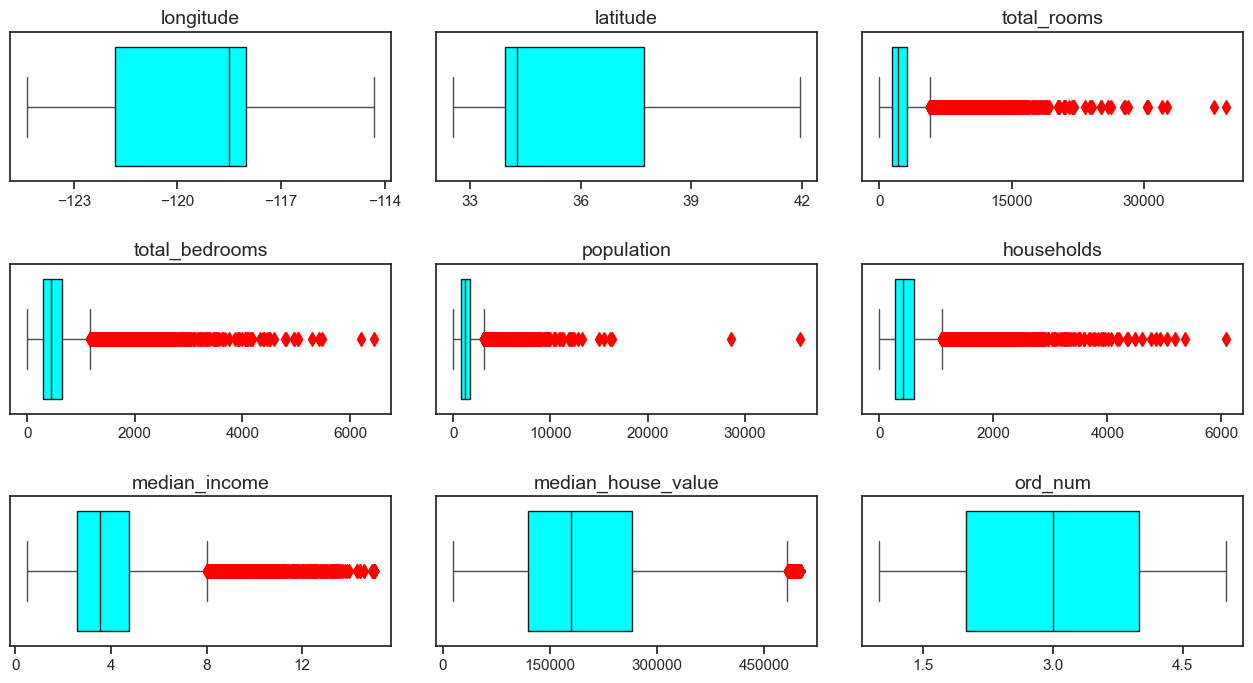

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator

# Select numeric columns, excluding 'row'
Ns = [ col for col in Ss if col not in My_Dicts.index.tolist() ]  # exclude ordinals

# Grid layout
n_cols = 3
n_rows = math.ceil(len(Ns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 7.3))
axes = axes.flatten()

# Boxplot styling
boxprops    = dict(linewidth=1, edgecolor='k', facecolor='cyan')
medianprops = dict(linewidth=1, color='k')
flierprops  = dict(marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red')

for i, col in enumerate(Ns):
    col_data = data[col].dropna()

    # Plot boxplot
    sns.boxplot(
        data=col_data.to_frame(),
        x=col,
        ax=axes[i],
        boxprops=boxprops,
        medianprops=medianprops,
        flierprops=flierprops
    )

    # Clean up labels and ticks
    axes[i].set_title(f"{col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].tick_params(axis='y', left=False, labelleft=False)  # 👈 Remove y-ticks

# Remove unused axes
for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
fig.savefig("Boxplot_Dirty_Scalar.png", dpi=300, bbox_inches='tight')

plt.show()

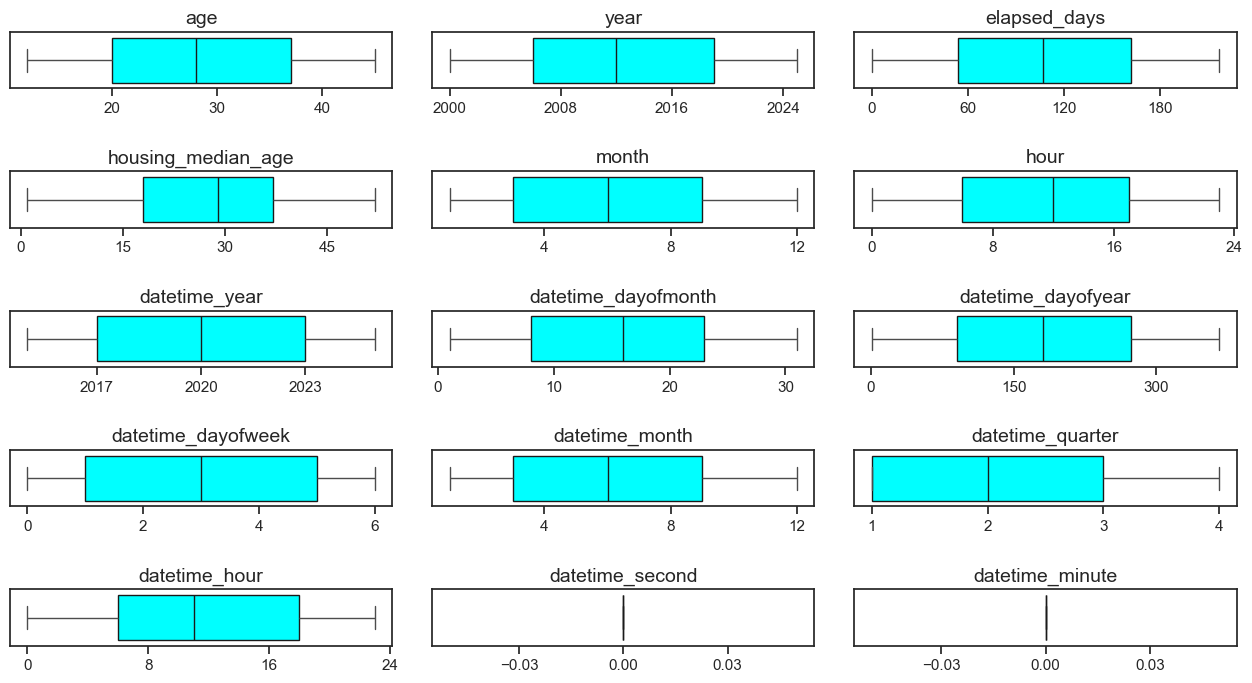

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator

# Select temporal columns, excluding 'row'
Ns = D_dir_ind + D_cyc_ind + D_dir_dep + D_cyc_dep

# Grid layout
n_cols = 3
n_rows = math.ceil(len(Ns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 7.3))
axes = axes.flatten()

# Boxplot styling
boxprops    = dict(linewidth=1, edgecolor='k', facecolor='cyan')
medianprops = dict(linewidth=1, color='k')
flierprops  = dict(marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red')

for i, col in enumerate(Ns):
    col_data = data[col].dropna()

    # Plot boxplot
    sns.boxplot(
        data=col_data.to_frame(),
        x=col,
        ax=axes[i],
        boxprops=boxprops,
        medianprops=medianprops,
        flierprops=flierprops
    )

    # Clean up labels and ticks
    axes[i].set_title(f"{col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].tick_params(axis='y', left=False, labelleft=False)  # 👈 Remove y-ticks

# Remove unused axes
for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
fig.savefig("Boxplot_Dirty_Temporal.png", dpi=300, bbox_inches='tight')

plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> winsorize

In [82]:
def winsorize( data, ft ):
    
    n     = data.shape[0]

    P_25  = data[ft].dropna().quantile(0.25)
    P_75  = data[ft].dropna().quantile(0.75)
    IQR   = P_75 - P_25
    
    upper = P_75 + 1.5*IQR
    lower = P_25 - 1.5*IQR

    V     = []
    for l in data[ft].to_list():
        try:
            if                    upper<=l: V.append(upper)
            elif    lower<l and l<upper   : V.append(l)
            elif l<=lower                 : V.append(lower)
            else                          : pass # Drop None
        except:
            ;   
            
    M     = np.mean(V)
    SD    = np.std(V)
    upper = M+3*SD
    lower = M-3*SD
    
    try:
        float_percent = 100 * data.loc[ data[ft] % 1 > 0, [ft] ].shape[0] / data.shape[0]
        if float_percent <= 1:
            upper = round(upper)
            lower = round(lower)
    except:
        ; 

    V, I, E, W = [], [], [], []
    n = -1
    for l in data[ft].to_list():
        n = n+1
        try:
            if upper<l: 
                V.append(upper)
                I.append( int(data.index[n]) )
                E.append(  l  )
                W.append(upper)
                
            elif l<lower: 
                V.append(lower)
                I.append( int(data.index[n]) )
                E.append(  l  )
                W.append(upper)
            else: 
                V.append(l) # Keep None
        except:
            ;
            
    return [ V, I, E, W ]

In [83]:
## Drop_Null_Winsorize
Drop_Null_Winsorize = 'W'     #  'D'  'N'  'W'

df_Win = pd.DataFrame()

for ft in   Ss   +   D_dir_ind + D_cyc_ind + D_dir_dep + D_cyc_dep: 
    
    V, I, E, W = winsorize( data[ [ft] ], ft )
     
    df = pd.DataFrame( index = I )
    df[    'feature'     ] =  ft
    df[    'problem'     ] = 'Extreme'
    df[ 'original_value' ] =  E
    
    if Drop_Null_Winsorize in ['W','w']:
        data[ft]               =  V
        df[  'capped_value'  ] =  W
        df['imputation_notes'] = 'Capped at mean ± 3 SD'
        
    elif Drop_Null_Winsorize in ['N','n']:
        data.loc[  I,   ft   ] =  np.nan
        df[ 'imputed_value'  ] =  ''
        df['imputation_notes'] =  ''
        
    elif Drop_Null_Winsorize in ['D','d']:
        data = data.drop( I, axis=0 )
        
    df_Win = pd.concat( [df_Win,df] )
    
df_Win.index.name='row'
df_Win.to_csv(  "df_Extreme.csv" , encoding="utf-8-sig")
df_Win.to_excel("df_Extreme.xlsx", index=True          )


df_Win.head(5)

,feature,problem,original_value,capped_value,imputation_notes
row,,,,,
3,total_rooms,Extreme,7099.0,6634.0,Capped at mean ± 3 SD
290,total_rooms,Extreme,12842.0,6634.0,Capped at mean ± 3 SD
515,total_rooms,Extreme,7355.0,6634.0,Capped at mean ± 3 SD
575,total_rooms,Extreme,7031.0,6634.0,Capped at mean ± 3 SD
577,total_rooms,Extreme,18634.0,6634.0,Capped at mean ± 3 SD


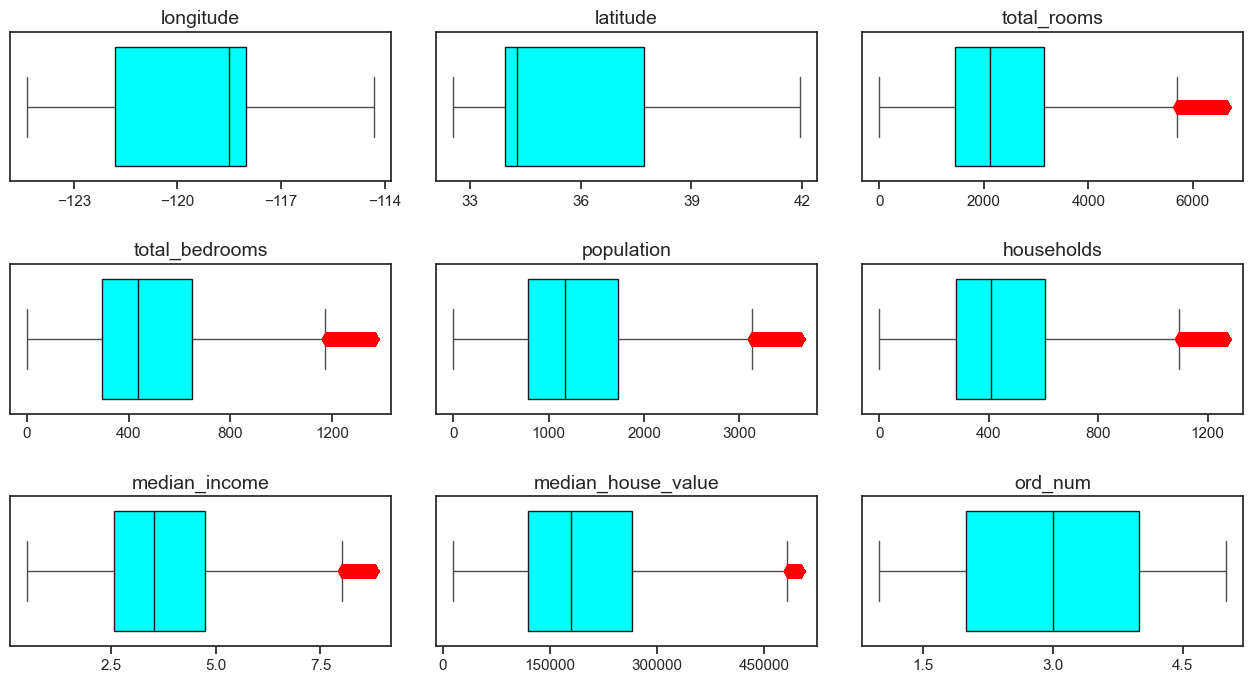

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator

# Select numeric columns, excluding 'row'
Ns = [ col for col in Ss if col not in My_Dicts.index.tolist() ]  # exclude ordinals

# Grid layout
n_cols = 3
n_rows = math.ceil(len(Ns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 7.3))
axes = axes.flatten()

# Boxplot styling
boxprops    = dict(linewidth=1, edgecolor='k', facecolor='cyan')
medianprops = dict(linewidth=1, color='k')
flierprops  = dict(marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red')

for i, col in enumerate(Ns):
    col_data = data[col].dropna()

    # Plot boxplot
    sns.boxplot(
        data=col_data.to_frame(),
        x=col,
        ax=axes[i],
        boxprops=boxprops,
        medianprops=medianprops,
        flierprops=flierprops
    )

    # Clean up labels and ticks
    axes[i].set_title(f"{col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].tick_params(axis='y', left=False, labelleft=False)  # 👈 Remove y-ticks

# Remove unused axes
for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
fig.savefig("Boxplot_Clean_Scalar.png", dpi=300, bbox_inches='tight')

plt.show()

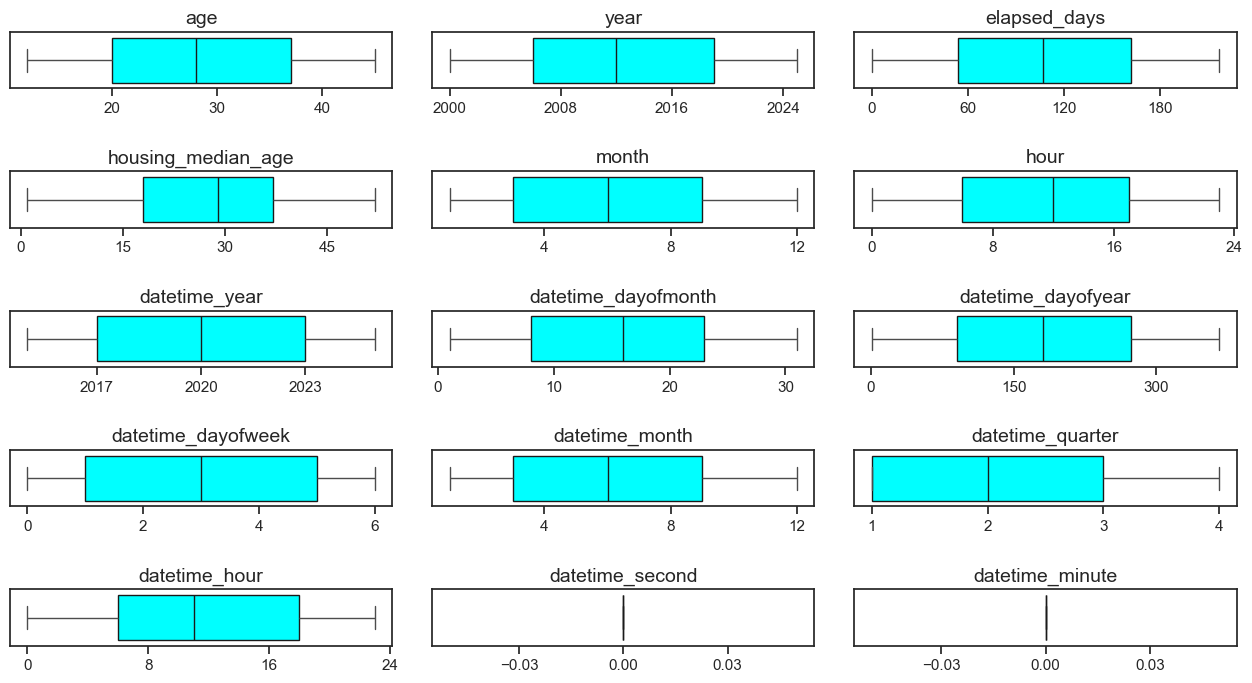

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator

# Select numeric columns, excluding 'row'
Ns = D_dir_ind + D_cyc_ind + D_dir_dep + D_cyc_dep

# Grid layout
n_cols = 3
n_rows = math.ceil(len(Ns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 7.3))
axes = axes.flatten()

# Boxplot styling
boxprops    = dict(linewidth=1, edgecolor='k', facecolor='cyan')
medianprops = dict(linewidth=1, color='k')
flierprops  = dict(marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red')

for i, col in enumerate(Ns):
    col_data = data[col].dropna()

    # Plot boxplot
    sns.boxplot(
        data=col_data.to_frame(),
        x=col,
        ax=axes[i],
        boxprops=boxprops,
        medianprops=medianprops,
        flierprops=flierprops
    )

    # Clean up labels and ticks
    axes[i].set_title(f"{col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    axes[i].tick_params(axis='y', left=False, labelleft=False)  # 👈 Remove y-ticks

# Remove unused axes
for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
fig.savefig("Boxplot_Clean_Temporal.png", dpi=300, bbox_inches='tight')

plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> YYYY MM DD hh mm ss ===> timestamp

In [29]:
for col in DTs: 
    data[ col ] = pd.to_datetime( data[col], errors='coerce' )
    data['Del'] = data[col].astype('int64') // 10**9 
    data.loc[     data[col].isna(), 'Del' ] = np.nan
    data[ col ] = data['Del']
    data        = data.drop( ['Del'], axis=1 )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> cyclic features ===> cyclic features + sin + cos

In [30]:
def Add_sin_cos_features( df, ft ):
    n = df[ft].max() - df[ft].min() + 1        
    s = np.sin( 2*np.pi * df[ft] / n );   df[ ft+'_sin' ] = np.round(s,6)
    c = np.cos( 2*np.pi * df[ft] / n );   df[ ft+'_cos' ] = np.round(c,6)
    return df

for col in D_cyc_ind+D_cyc_dep:
    data = Add_sin_cos_features( data, col )
    if   col in D_cyc_ind:  D_cyc_ind_sin_cos = D_cyc_ind_sin_cos + [ col+'_sin', col+'_cos' ]
    elif col in D_cyc_dep:  D_cyc_dep_sin_cos = D_cyc_dep_sin_cos + [ col+'_sin', col+'_cos' ]
    
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_num,bin_cat,ord_num,ord_cat,datetime,year,age,elapsed_days,month,hour,nominal_num,nominal_cat,datetime_year,datetime_quarter,datetime_month,datetime_dayofyear,datetime_dayofmonth,datetime_dayofweek,datetime_hour,datetime_minute,datetime_second,month_sin,month_cos,hour_sin,hour_cos,datetime_dayofmonth_sin,datetime_dayofmonth_cos,datetime_dayofyear_sin,datetime_dayofyear_cos,datetime_dayofweek_sin,datetime_dayofweek_cos,datetime_month_sin,datetime_month_cos,datetime_quarter_sin,datetime_quarter_cos,datetime_hour_sin,datetime_hour_cos,datetime_second_sin,datetime_second_cos,datetime_minute_sin,datetime_minute_cos
row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,Yes,5.0,5.0,1.766009e+09,2001.0,27.0,141.0,10.0,21.0,0.0,Violet,2025.0,4.0,12.0,351.0,17.0,2.0,22.0,0.0,0.0,-0.866025,0.5,-0.707107,0.707107,-0.299363,-0.954139,-0.254671,0.967028,0.974928,-0.222521,-0.000000,1.000000,-0.0,1.0,-0.500000,0.866025,0.0,1.0,0.0,1.0
3,-122.22,37.86,21.0,6634,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,Yes,4.0,4.0,1.752822e+09,2020.0,35.0,5.0,3.0,18.0,2.0,Blue,2025.0,3.0,7.0,199.0,18.0,4.0,7.0,0.0,0.0,1.000000,0.0,-1.000000,-0.000000,-0.485302,-0.874347,-0.271234,-0.962513,-0.433884,-0.900969,-0.500000,-0.866025,-1.0,-0.0,0.965926,-0.258819,0.0,1.0,0.0,1.0
4,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,Yes,1.0,1.0,1.661375e+09,2001.0,43.0,78.0,2.0,6.0,3.0,Green,2022.0,3.0,8.0,236.0,24.0,2.0,21.0,0.0,0.0,0.866025,0.5,1.000000,0.000000,-0.988468,0.151428,-0.789418,-0.613856,0.974928,-0.222521,-0.866025,-0.500000,-1.0,-0.0,-0.707107,0.707107,0.0,1.0,0.0,1.0
5,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,No,3.0,3.0,1.659449e+09,2000.0,24.0,37.0,9.0,9.0,3.0,Green,2022.0,3.0,8.0,214.0,2.0,1.0,14.0,0.0,0.0,-1.000000,-0.0,0.707107,-0.707107,0.394356,0.918958,-0.507415,-0.861702,0.781831,0.623490,-0.866025,-0.500000,-1.0,-0.0,-0.500000,-0.866025,0.0,1.0,0.0,1.0
6,-122.26,37.84,42.0,2555,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,1.0,Yes,4.0,4.0,1.713794e+09,2015.0,26.0,184.0,12.0,23.0,1.0,Pink,2024.0,2.0,4.0,113.0,22.0,0.0,14.0,0.0,0.0,-0.000000,1.0,-0.258819,0.965926,-0.968077,-0.250653,0.932655,-0.360771,0.000000,1.000000,0.866025,-0.500000,0.0,-1.0,-0.500000,-0.866025,0.0,1.0,0.0,1.0


In [31]:
import math
def sincos_to_scalar( df, ft, s, c ):
    
    th_rad = math.atan2(s,c)
    th_deg = np.degrees( th_rad )
    
    n = df[ft].max() - df[ft].min() + 1 
    val_scalar = float( th_deg * n/360 )
    
    return val_scalar

sincos_to_scalar( data, 'datetime_quarter', 0, -1 )

2.0

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving & Loading

In [32]:
D_cyc_ind_sin_cos = list(set(D_cyc_ind_sin_cos))
D_cyc_dep_sin_cos = list(set(D_cyc_dep_sin_cos))

pickle.dump( D_cyc_ind_sin_cos , open('D_cyc_ind_sin_cos'      ,'wb') )  # save
pickle.dump( D_cyc_dep_sin_cos , open('D_cyc_dep_sin_cos'      ,'wb') )  # save
pickle.dump(       data        , open('Data_Feature_Engineered','wb') )  # save

D_cyc_ind_sin_cos = pickle.load( open('D_cyc_ind_sin_cos'      ,'rb') )  # load
D_cyc_dep_sin_cos = pickle.load( open('D_cyc_dep_sin_cos'      ,'rb') )  # load
data              = pickle.load( open('Data_Feature_Engineered','rb') )  # load

data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_num,bin_cat,ord_num,ord_cat,datetime,year,age,elapsed_days,month,hour,nominal_num,nominal_cat,datetime_year,datetime_quarter,datetime_month,datetime_dayofyear,datetime_dayofmonth,datetime_dayofweek,datetime_hour,datetime_minute,datetime_second,month_sin,month_cos,hour_sin,hour_cos,datetime_dayofmonth_sin,datetime_dayofmonth_cos,datetime_dayofyear_sin,datetime_dayofyear_cos,datetime_dayofweek_sin,datetime_dayofweek_cos,datetime_month_sin,datetime_month_cos,datetime_quarter_sin,datetime_quarter_cos,datetime_hour_sin,datetime_hour_cos,datetime_second_sin,datetime_second_cos,datetime_minute_sin,datetime_minute_cos
row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,Yes,5.0,5.0,1.766009e+09,2001.0,27.0,141.0,10.0,21.0,0.0,Violet,2025.0,4.0,12.0,351.0,17.0,2.0,22.0,0.0,0.0,-0.866025,0.5,-0.707107,0.707107,-0.299363,-0.954139,-0.254671,0.967028,0.974928,-0.222521,-0.000000,1.000000,-0.0,1.0,-0.500000,0.866025,0.0,1.0,0.0,1.0
3,-122.22,37.86,21.0,6634,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,Yes,4.0,4.0,1.752822e+09,2020.0,35.0,5.0,3.0,18.0,2.0,Blue,2025.0,3.0,7.0,199.0,18.0,4.0,7.0,0.0,0.0,1.000000,0.0,-1.000000,-0.000000,-0.485302,-0.874347,-0.271234,-0.962513,-0.433884,-0.900969,-0.500000,-0.866025,-1.0,-0.0,0.965926,-0.258819,0.0,1.0,0.0,1.0
4,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,Yes,1.0,1.0,1.661375e+09,2001.0,43.0,78.0,2.0,6.0,3.0,Green,2022.0,3.0,8.0,236.0,24.0,2.0,21.0,0.0,0.0,0.866025,0.5,1.000000,0.000000,-0.988468,0.151428,-0.789418,-0.613856,0.974928,-0.222521,-0.866025,-0.500000,-1.0,-0.0,-0.707107,0.707107,0.0,1.0,0.0,1.0


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Imputing Missing Values

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Before_Treatment

In [33]:
Sclr_Cols = Ss + DTs + D_dir_ind + D_cyc_ind + D_cyc_ind_sin_cos + D_dir_dep + D_cyc_dep + D_cyc_dep_sin_cos
Cat_Cols  = Cs

Before_Treatment = pd.DataFrame(data.isnull().sum(), columns=['Number of Missing Values']) 
DF, I_missing_total, I_not_missing_total = [], [], []

for ft in data.columns:
    
    if Before_Treatment.loc[ ft, 'Number of Missing Values' ] > 0:
        I_missing     = (data[ft][~data[ft].notna()]).index.tolist()
        I_not_missing = (data[ft][~data[ft].isnull()]).index.tolist()
    else:
        I_missing     = []
        I_not_missing = []
        
    I_missing_total     = I_missing_total     + I_missing
    #I_not_missing_total = I_not_missing_total + I_not_missing
        
    if ft in Sclr_Cols:
        C = ['feature', 'problem','original_value','imputed_value','confidence_flag','imputation_notes',
             'confidence_score','spreadConf','adjR2','bootstrap_impVals' ]
    else:
        C = ['feature', 'problem','original_value','imputed_value','confidence_flag','imputation_notes',
             'confidence_score','spreadConf','adjAcc','adjRec','adjF1','bootstrap_impVals','classProbabilities' ]
    df = pd.DataFrame(
        columns=C,
        index=I_missing ).fillna('')
    df['feature'       ] =  ft
    for i in I_missing: 
        df.loc[i,'problem'       ] = 'Missing'
        df.loc[i,'original_value'] = data.loc[i,ft] 
    df = df.fillna('')
    DF.append(df) 

I_missing_total     = list(set( I_missing_total     ))
#I_not_missing_total = list(set( I_not_missing_total ))
pickle.dump( I_missing_total,  open('I_missing_total','wb') )  # save
I_missing_total = pickle.load( open('I_missing_total','rb') )  # load

Before_Treatment['df_report_est1'] = DF
Before_Treatment['df_report_est2'] = DF
Before_Treatment = Before_Treatment.sort_values(['Number of Missing Values'],ascending=True)

C = [ 'feature', 'problem', 'original_value', 'imputed_value', 'confidence_flag', 'imputation_notes', 'disagreement_%',
      'confidence_score', 'spreadConf', 'adjR2', 'adjAcc', 'adjRec', 'adjF1', 'classProbabilities' ]

Before_Treatment['df_report_est3'] = None

for ft in Before_Treatment.index:
    df_report_est1 = Before_Treatment.loc[ ft, 'df_report_est1' ]
    Index          = df_report_est1.index.tolist()
    df_report_est3 = pd.DataFrame(columns=C,index=Index).fillna('')
    df_report_est3.index = Index
    df_report_est3['feature'       ] =  ft
    df_report_est3['problem'       ] = 'Missing'
    for i in Index: 
        df_report_est3.loc[i,'problem'       ] = 'Missing'
        df_report_est3.loc[i,'original_value'] = data.loc[i,ft] 
    df_report_est3 = df_report_est3.fillna('')
    Before_Treatment.at[ ft, 'df_report_est3' ] = df_report_est3
    
# Adding df_Win
if Drop_Null_Winsorize in ['N','n']:
    for ft in data.columns:
        df_win     = df_Win[ df_Win['feature']==ft ] 
    
        df_report1 = Before_Treatment.loc[ft,'df_report_est1']
        df_report2 = Before_Treatment.loc[ft,'df_report_est2']
        df_report3 = Before_Treatment.loc[ft,'df_report_est3']
    
        for i in df_win.index:
            df_report1.loc[i,    'problem'     ] = df_win.loc[i,    'problem'     ]
            df_report1.loc[i, 'original_value' ] = df_win.loc[i, 'original_value' ]
        
            df_report2.loc[i,    'problem'     ] = df_win.loc[i,    'problem'     ]
            df_report2.loc[i, 'original_value' ] = df_win.loc[i, 'original_value' ]
        
            df_report3.loc[i,    'problem'     ] = df_win.loc[i,    'problem'     ]
            df_report3.loc[i, 'original_value' ] = df_win.loc[i, 'original_value' ]
        
        Before_Treatment.at[ft,'df_report_est1'] = df_report1
        Before_Treatment.at[ft,'df_report_est2'] = df_report2
        Before_Treatment.at[ft,'df_report_est3'] = df_report3
        
        
# Saving & Loading
pickle.dump( Before_Treatment,  open('Before_Treatment_base','wb') )  # save
Before_Treatment = pickle.load( open('Before_Treatment_base','rb') )  # load
Before_Treatment

,Number of Missing Values,df_report_est1,df_report_est2,df_report_est3
longitude,0,"Empty DataFrame Columns: [feature, problem, or...","Empty DataFrame Columns: [feature, problem, or...","Empty DataFrame Columns: [feature, problem, or..."
latitude,0,"Empty DataFrame Columns: [feature, problem, or...","Empty DataFrame Columns: [feature, problem, or...","Empty DataFrame Columns: [feature, problem, or..."
total_rooms,0,"Empty DataFrame Columns: [feature, problem, or...","Empty DataFrame Columns: [feature, problem, or...","Empty DataFrame Columns: [feature, problem, or..."
population,1,feature problem original_value imput...,feature problem original_value imput...,feature problem original_value imput...
median_income,1,feature problem original_value im...,feature problem original_value im...,feature problem original_value im...
hour_cos,2,feature problem original_value imputed_v...,feature problem original_value imputed_v...,feature problem original_value imputed_v...
hour_sin,2,feature problem original_value imputed_v...,feature problem original_value imputed_v...,feature problem original_value imputed_v...
month_cos,2,feature problem original_value imputed_...,feature problem original_value imputed_...,feature problem original_value imputed_...
month_sin,2,feature problem original_value imputed_...,feature problem original_value imputed_...,feature problem original_value imputed_...
hour,2,feature problem original_value imputed_val...,feature problem original_value imputed_val...,feature problem original_value imputed_val...


In [34]:
df_report3 = Before_Treatment.loc['housing_median_age','df_report_est3']
df_report3

,feature,problem,original_value,imputed_value,confidence_flag,imputation_notes,disagreement_%,confidence_score,spreadConf,adjR2,adjAcc,adjRec,adjF1,classProbabilities
3265,housing_median_age,Missing,,,,,,,,,,,,
3266,housing_median_age,Missing,,,,,,,,,,,,
3267,housing_median_age,Missing,,,,,,,,,,,,
3271,housing_median_age,Missing,,,,,,,,,,,,
3272,housing_median_age,Missing,,,,,,,,,,,,
3275,housing_median_age,Missing,,,,,,,,,,,,
3283,housing_median_age,Missing,,,,,,,,,,,,


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> checking

In [35]:
# help
print( data.columns.tolist() )

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'bin_num', 'bin_cat', 'ord_num', 'ord_cat', 'datetime', 'year', 'age', 'elapsed_days', 'month', 'hour', 'nominal_num', 'nominal_cat', 'datetime_year', 'datetime_quarter', 'datetime_month', 'datetime_dayofyear', 'datetime_dayofmonth', 'datetime_dayofweek', 'datetime_hour', 'datetime_minute', 'datetime_second', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'datetime_dayofmonth_sin', 'datetime_dayofmonth_cos', 'datetime_dayofyear_sin', 'datetime_dayofyear_cos', 'datetime_dayofweek_sin', 'datetime_dayofweek_cos', 'datetime_month_sin', 'datetime_month_cos', 'datetime_quarter_sin', 'datetime_quarter_cos', 'datetime_hour_sin', 'datetime_hour_cos', 'datetime_second_sin', 'datetime_second_cos', 'datetime_minute_sin', 'datetime_minute_cos']


In [36]:
# input
target_col = 'datetime_minute'

# auto
display( Before_Treatment.loc[ target_col, 'df_report_est1' ] )
display( Before_Treatment.loc[ target_col, 'df_report_est2' ] )
display( Before_Treatment.loc[ target_col, 'df_report_est3' ] )

,feature,problem,original_value,imputed_value,confidence_flag,imputation_notes,confidence_score,spreadConf,adjR2,bootstrap_impVals
299,datetime_minute,Missing,,,,,,,,
395,datetime_minute,Missing,,,,,,,,
409,datetime_minute,Missing,,,,,,,,
432,datetime_minute,Missing,,,,,,,,
464,datetime_minute,Missing,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
20295,datetime_minute,Missing,,,,,,,,
20493,datetime_minute,Missing,,,,,,,,
20629,datetime_minute,Missing,,,,,,,,
20645,datetime_minute,Missing,,,,,,,,


,feature,problem,original_value,imputed_value,confidence_flag,imputation_notes,confidence_score,spreadConf,adjR2,bootstrap_impVals
299,datetime_minute,Missing,,,,,,,,
395,datetime_minute,Missing,,,,,,,,
409,datetime_minute,Missing,,,,,,,,
432,datetime_minute,Missing,,,,,,,,
464,datetime_minute,Missing,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
20295,datetime_minute,Missing,,,,,,,,
20493,datetime_minute,Missing,,,,,,,,
20629,datetime_minute,Missing,,,,,,,,
20645,datetime_minute,Missing,,,,,,,,


,feature,problem,original_value,imputed_value,confidence_flag,imputation_notes,disagreement_%,confidence_score,spreadConf,adjR2,adjAcc,adjRec,adjF1,classProbabilities
299,datetime_minute,Missing,,,,,,,,,,,,
395,datetime_minute,Missing,,,,,,,,,,,,
409,datetime_minute,Missing,,,,,,,,,,,,
432,datetime_minute,Missing,,,,,,,,,,,,
464,datetime_minute,Missing,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,datetime_minute,Missing,,,,,,,,,,,,
20493,datetime_minute,Missing,,,,,,,,,,,,
20629,datetime_minute,Missing,,,,,,,,,,,,
20645,datetime_minute,Missing,,,,,,,,,,,,


In [37]:
for ft in DTs: 
    data[ft] = pd.to_datetime( data[ft] * 10**9, errors='coerce' )
    data[ft] = data[ft].dt.strftime("%Y-%m-%d %H:%M:%S")
    data[ft] = pd.to_datetime( data[ft], errors='coerce' )
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_num,bin_cat,ord_num,ord_cat,datetime,year,age,elapsed_days,month,hour,nominal_num,nominal_cat,datetime_year,datetime_quarter,datetime_month,datetime_dayofyear,datetime_dayofmonth,datetime_dayofweek,datetime_hour,datetime_minute,datetime_second,month_sin,month_cos,hour_sin,hour_cos,datetime_dayofmonth_sin,datetime_dayofmonth_cos,datetime_dayofyear_sin,datetime_dayofyear_cos,datetime_dayofweek_sin,datetime_dayofweek_cos,datetime_month_sin,datetime_month_cos,datetime_quarter_sin,datetime_quarter_cos,datetime_hour_sin,datetime_hour_cos,datetime_second_sin,datetime_second_cos,datetime_minute_sin,datetime_minute_cos
row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,Yes,5.0,5.0,2025-12-17 22:00:00,2001.0,27.0,141.0,10.0,21.0,0.0,Violet,2025.0,4.0,12.0,351.0,17.0,2.0,22.0,0.0,0.0,-0.866025,0.5,-0.707107,0.707107,-0.299363,-0.954139,-0.254671,0.967028,0.974928,-0.222521,-0.000000,1.000000,-0.0,1.0,-0.500000,0.866025,0.0,1.0,0.0,1.0
3,-122.22,37.86,21.0,6634,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,Yes,4.0,4.0,2025-07-18 07:00:00,2020.0,35.0,5.0,3.0,18.0,2.0,Blue,2025.0,3.0,7.0,199.0,18.0,4.0,7.0,0.0,0.0,1.000000,0.0,-1.000000,-0.000000,-0.485302,-0.874347,-0.271234,-0.962513,-0.433884,-0.900969,-0.500000,-0.866025,-1.0,-0.0,0.965926,-0.258819,0.0,1.0,0.0,1.0
4,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,Yes,1.0,1.0,2022-08-24 21:00:00,2001.0,43.0,78.0,2.0,6.0,3.0,Green,2022.0,3.0,8.0,236.0,24.0,2.0,21.0,0.0,0.0,0.866025,0.5,1.000000,0.000000,-0.988468,0.151428,-0.789418,-0.613856,0.974928,-0.222521,-0.866025,-0.500000,-1.0,-0.0,-0.707107,0.707107,0.0,1.0,0.0,1.0
5,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,No,3.0,3.0,2022-08-02 14:00:00,2000.0,24.0,37.0,9.0,9.0,3.0,Green,2022.0,3.0,8.0,214.0,2.0,1.0,14.0,0.0,0.0,-1.000000,-0.0,0.707107,-0.707107,0.394356,0.918958,-0.507415,-0.861702,0.781831,0.623490,-0.866025,-0.500000,-1.0,-0.0,-0.500000,-0.866025,0.0,1.0,0.0,1.0
6,-122.26,37.84,42.0,2555,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,1.0,Yes,4.0,4.0,2024-04-22 14:00:00,2015.0,26.0,184.0,12.0,23.0,1.0,Pink,2024.0,2.0,4.0,113.0,22.0,0.0,14.0,0.0,0.0,-0.000000,1.0,-0.258819,0.965926,-0.968077,-0.250653,0.932655,-0.360771,0.000000,1.000000,0.866025,-0.500000,0.0,-1.0,-0.500000,-0.866025,0.0,1.0,0.0,1.0


In [38]:
data.shape

(20645, 51)

In [39]:
data[Cs].isnull().sum()

ocean_proximity      6
bin_num            198
bin_cat            216
nominal_num        211
nominal_cat        214
dtype: int64

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> END

##   
##   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Templates

## Cat

In [40]:
df = pd.DataFrame(); df['ABC']=['A1  @B1@C1','A2@ B2@C2','A3@B3@ C3', None]; df

,ABC
0,A1 @B1@C1
1,A2@ B2@C2
2,A3@B3@ C3
3,None


In [41]:
# input
A, B, C = [], [], []

for i in df['ABC']:
    
    #if type(i) != 'str': i='@@'
    if i == None: i='@@'
        
    splt = i.split('@')
    
    if len(splt[0].strip()) > 0 : A.append( str(splt[0].strip()) )
    else                        : A.append( None )
    
    if len(splt[1].strip()) > 0 : B.append( str(splt[1].strip()) )
    else                        : B.append( None )
    
    if len(splt[2].strip()) > 0 : C.append( str(splt[2].strip()) )
    else                        : C.append( None )
        
df[ 'A' ] = A
df[ 'B' ] = B
df[ 'C' ] = C 
df[ ['ABC','A','B','C'] ].head()

,ABC,A,B,C
0,A1 @B1@C1,A1,B1,C1
1,A2@ B2@C2,A2,B2,C2
2,A3@B3@ C3,A3,B3,C3
3,None,None,None,None


## Cat Phone-Number

In [42]:
df = pd.DataFrame(); df['Phone']=[' 123  - 4567  ', '  777 -    3616 ','333 -  4444  ', None]; df

,Phone
0,123 - 4567
1,777 - 3616
2,333 - 4444
3,None


In [43]:
# input
A, B = [], [] 

for i in df['Phone']:
    
    if i==None:
        A.append(None)
        B.append(None)
        
    elif type(i)==float:
        A.append(None)
        B.append(None)
        
    else: 
        i = i.strip()
        A.append(i[:3])
        B.append(i[-4:])      
        
df[ 'A' ] = np.array(A).astype(float)
df[ 'B' ] = np.array(B).astype(float)
df[ ['Phone','A','B'] ].head().fillna('*******')

,Phone,A,B
0,123 - 4567,123.0,4567.0
1,777 - 3616,777.0,3616.0
2,333 - 4444,333.0,4444.0
3,*******,*******,*******


## Cat-Sc Group
 - grouping a Scalar by a Categorical
 - Making New Columns Based  on Count, Mean, Median, Min, Max

In [44]:
df = pd.DataFrame()
df['C'] = ['A', 'A', None, 'B', 'B', 'B'  ]
df['S'] = [ 10, 20,  100,  200, 300, None ]
df

,C,S
0,A,10.0
1,A,20.0
2,None,100.0
3,B,200.0
4,B,300.0
5,B,NaN


In [45]:
g = df.groupby('C').count()  # count mean median min max

df['G'] = np.nan*df.shape[0]
for sub in g.index: 
    df.loc[ df['C']==sub, 'G' ] = g.loc[sub,'S']
    
df

,C,S,G
0,A,10.0,2.0
1,A,20.0,2.0
2,None,100.0,NaN
3,B,200.0,2.0
4,B,300.0,2.0
5,B,NaN,2.0


## Sc Binning

In [46]:
df = pd.DataFrame()
df['S'] = [74, 77, 84, None, 89, 95]
df

,S
0,74.0
1,77.0
2,84.0
3,NaN
4,89.0
5,95.0


In [47]:
df['Bin'] = '-'*df.shape[0] 
for i in df.index:
    if   df.loc[i,'S'] >=  90 : df.loc[i,'Bin'] = '90-100'
    elif df.loc[i,'S'] >=  80 : df.loc[i,'Bin'] = '80-89'
    elif df.loc[i,'S'] >=  70 : df.loc[i,'Bin'] = '70-79'
    elif df.loc[i,'S'] <   70 : df.loc[i,'Bin'] = '0-69'
    else                      : df.loc[i,'Bin'] =  None
df

,S,Bin
0,74.0,70-79
1,77.0,70-79
2,84.0,80-89
3,NaN,None
4,89.0,80-89
5,95.0,90-100


## Sc Ratio & Operations
 - Note: Do it after Imputing by KNN

In [48]:
df = pd.DataFrame()
df['S1'] = [1,3,None, 5]
df['S2'] = [5,12,20,None]
df

,S1,S2
0,1.0,5.0
1,3.0,12.0
2,NaN,20.0
3,5.0,NaN


In [49]:
df[  'Ratio'   ] = df['S1'] / df['S2']
df['Operations'] = df['S1'] + df['S2']
df

,S1,S2,Ratio,Operations
0,1.0,5.0,0.20,6.0
1,3.0,12.0,0.25,15.0
2,NaN,20.0,NaN,NaN
3,5.0,NaN,NaN,NaN


## Date & Time

In [50]:
df = pd.DataFrame()
df['DATE-TIME'] = ['Sat Feb 10 14:52:31 2024','Sun Feb 11 16:27:59 2024',None]  # import time; time.ctime()
df

,DATE-TIME
0,Sat Feb 10 14:52:31 2024
1,Sun Feb 11 16:27:59 2024
2,None


In [51]:
df['DATE-TIME'] = pd.to_datetime( df['DATE-TIME'] )

df[ 'YEAR' ] = df['DATE-TIME'].dt.year
df['MONTH' ] = df['DATE-TIME'].dt.month
df[ 'DAY'  ] = df['DATE-TIME'].dt.day
df[ 'HOUR' ] = df['DATE-TIME'].dt.hour
df['MINUTE'] = df['DATE-TIME'].dt.minute
df['SECOND'] = df['DATE-TIME'].dt.second
df

,DATE-TIME,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
0,2024-02-10 14:52:31,2024.0,2.0,10.0,14.0,52.0,31.0
1,2024-02-11 16:27:59,2024.0,2.0,11.0,16.0,27.0,59.0
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN


## NomCat One-Hot-Grouping

In [52]:
df = pd.DataFrame()
df[ 'Nom_Cat' ]  =  [  'A',  'A',  None, 'A',  'A',  'B', 'A',  'A',  None,  'B', 'A',  'A', 'B', 'A',  'B', 'A' ]
df[  'Class'  ]  =  [ 'C1', 'C1',  'C2','C2', 'C3', None,'C3', 'C1',  'C1', 'C2','C2', 'C3','C3','C3', None,'C3' ]

N = df.shape[0]
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Nom_Cat,A,A,None,A,A,B,A,A,None,B,A,A,B,A,B,A
Class,C1,C1,C2,C2,C3,None,C3,C1,C1,C2,C2,C3,C3,C3,None,C3


In [53]:
def One_Hot_Grouper(df,ft,est_col,n_bs,n_sam):
    
    DF = df.copy()
    DF.dropna( subset=[est_col], inplace=True )
    
    N  = DF.shape[0]
    Sub_Cats = DF[ft].dropna().unique()
    Classes  = DF[est_col].dropna().astype(str).unique() 
 
    for b in Classes:
        New_FT = ft+'_'+b
        DF[ New_FT ] = [None]*N
        
        for a in Sub_Cats:
            PerCent = 0
            for i in range(n_bs):
                S    = DF.sample( int(min(n_sam,DF.shape[0])) )
                N_ab = S.loc[ S[ft]==a, : ].loc[ S[est_col]==b, : ].count()[ft] 
                N_a  = S.loc[ S[ft]==a, : ].count()[ft] + 1e-16
                PerCent = PerCent + N_ab / N_a
            PerCent = PerCent/n_bs
            PerCent = np.round(PerCent,3)
            DF.loc[ DF[ft]==a, [New_FT] ] = PerCent
        
        DF[ New_FT ] = DF[ New_FT ].astype(float)
                
    return DF


new_df = One_Hot_Grouper(df,'Nom_Cat','Class',300,10)
new_df 

,Nom_Cat,Class,Nom_Cat_C1,Nom_Cat_C2,Nom_Cat_C3
0,A,C1,0.292,0.196,0.503
1,A,C1,0.292,0.196,0.503
2,None,C2,NaN,NaN,NaN
3,A,C2,0.292,0.196,0.503
4,A,C3,0.292,0.196,0.503
6,A,C3,0.292,0.196,0.503
7,A,C1,0.292,0.196,0.503
8,None,C1,NaN,NaN,NaN
9,B,C2,0.000,0.457,0.422
10,A,C2,0.292,0.196,0.503


In [54]:
def Make_df_Nom_Cats( new_df, Cats_of_interest, est_col ):
    
    df = new_df.copy()
    
    Classes = df[est_col].copy().dropna().unique().tolist()
    A,B, Cats_of_interest_SubCats = [],[],[]

    for ft in Cats_of_interest:
    
        Cols = [ft]
        for c in Classes: 
            SubCat = ft+'_'+c
            Cols.append( SubCat ) 
            Cats_of_interest_SubCats.append( SubCat )
        
        df_Cols = df.loc[:,Cols].copy().drop_duplicates()
        df_Cols.index = range( df_Cols.shape[0] )
        df_Cols.dropna( subset=[ft], inplace=True )
    
        A.append(ft) 
        B.append(df_Cols)
    
    df_Nom_Cats = pd.DataFrame()
    df_Nom_Cats['One_Hot'] = B 
    df_Nom_Cats.index      = A

    return df_Nom_Cats, Cats_of_interest_SubCats


Cats_of_interest = ['Nom_Cat']
est_col = 'Class'
df_NomCat, SC_NomCat = Make_df_Nom_Cats( new_df, Cats_of_interest, est_col )

print(SC_NomCat)
df_NomCat

['Nom_Cat_C1', 'Nom_Cat_C2', 'Nom_Cat_C3']


,One_Hot
Nom_Cat,Nom_Cat Nom_Cat_C1 Nom_Cat_C2 Nom_Cat_C3 ...


#####   

#####   

#####   